# This model has already been trained. Use keras.models.load_model ( )

In [72]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist.load_data() 

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[y_train[0]]

'Coat'

In [51]:
X_train, X_valid, X_test, = X_train.reshape(-1,28,28,1), X_valid.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1)



In [52]:
X_train.shape

(55000, 28, 28, 1)

In [53]:
X_valid.shape

(5000, 28, 28, 1)

In [55]:
X_test.shape

(10000, 28, 28, 1)

In [56]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax'),


])

In [57]:
model.summary()
#First layer has 3200 params - 7 X 7 weights X 64 Filters + 64 Biases

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 256)        

In [58]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
             )

In [59]:
results = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 202s 117ms/step - loss: 1.3370 - accuracy: 0.5074 - val_loss: 0.7202 - val_accuracy: 0.7426
Epoch 2/30
1719/1719 [==============================] - 200s 116ms/step - loss: 0.8043 - accuracy: 0.7072 - val_loss: 0.5562 - val_accuracy: 0.8006
Epoch 3/30
1719/1719 [==============================] - 200s 116ms/step - loss: 0.6736 - accuracy: 0.7544 - val_loss: 0.4755 - val_accuracy: 0.8188
Epoch 4/30
1719/1719 [==============================] - 200s 116ms/step - loss: 0.5967 - accuracy: 0.7851 - val_loss: 0.4442 - val_accuracy: 0.8434
Epoch 5/30
1719/1719 [==============================] - 200s 116ms/step - loss: 0.5505 - accuracy: 0.8055 - val_loss: 0.3989 - val_accuracy: 0.8528
Epoch 6/30
1719/1719 [==============================] - 200s 117ms/step - loss: 0.5139 - accuracy: 0.8185 - val_loss: 0.3823 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 201s 117ms/step - loss: 0.4836 - accuracy: 0.8314 - val_

In [64]:
#model.save("MNIST_Fashion")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MNIST_Fashion/assets


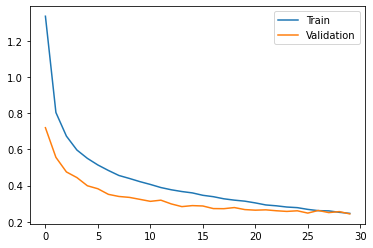

In [63]:
plt.plot(results.history['loss'], label = 'Train');
plt.plot(results.history['val_loss'], label = 'Validation');
plt.legend();

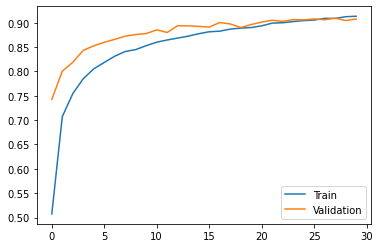

In [65]:
plt.plot(results.history['accuracy'], label = 'Train');
plt.plot(results.history['val_accuracy'], label = 'Validation');
plt.legend();

In [66]:
print('Training accuracy:', model.evaluate(X_train, y_train)[1])

1719/1719 [==============================] - 46s 27ms/step - loss: 0.1729 - accuracy: 0.9353
Training accuracy: 0.9352909326553345


In [67]:
print('Testing accuracy:', model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.2705 - accuracy: 0.9040
Testing accuracy: 0.9039999842643738


In [94]:
reconstructed_model = keras.models.load_model("MNIST_Fashion")

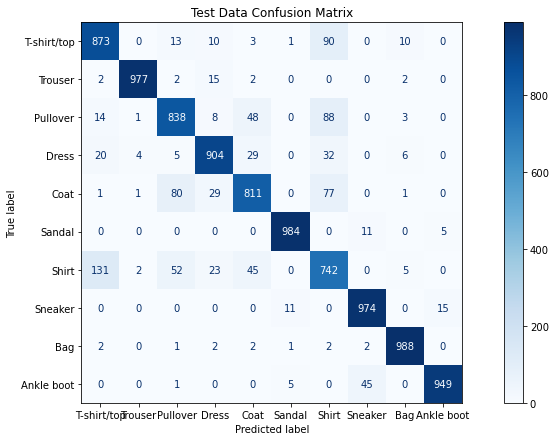

In [95]:
fig, ax = plt.subplots(figsize = (15,7))
ax.set_title('Test Data Confusion Matrix')
y_pred = np.argmax(reconstructed_model.predict(X_test), axis=-1)

labels = class_names

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues, ax = ax);

In [100]:
from IPython.display import clear_output
import time

for i in range(10):
    sample = np.random.randint(0,10000)
    plt.imshow(X_test[sample], cmap = 'gray');
    plt.show()
    print('Model predicts:', class_names[int(np.argmax(reconstructed_model.predict(X_test[sample].reshape(1,28,28,1)), axis = -1))])
    time.sleep(2)
    clear_output()
    